In [1]:
import pandas as pd
import nodule_structs
import xml.etree.ElementTree as etree
import numpy as np
import pydicom as dcm

In [2]:
ann = pd.read_csv("C:\\Users\\stan_\\OneDrive\\Документы\\metadata.csv")

In [3]:
ann[ann['Series UID'].index == '1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824']['File Location'].values

array(['.\\LIDC-IDRI\\LIDC-IDRI-0078\\01-01-2000-NA-NA-68432\\3165.000000-NA-53824'],
      dtype=object)

In [4]:
a = list(ann['Series UID'].index)
for i in range(5):
    print(a[i])
a.index("1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824")

1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902
1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818074696859567662357
1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264
1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390984321013050559882


155

In [5]:
ann.head(1)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,1,6,91 MB,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...,2023-03-03T17:54:02.695


In [6]:
drop_ann = ann.drop(columns=['3rd Party Analysis', 'Collection', 'File Size', 'Download Timestamp', 'Study Date', 'Series Description', 'Study UID', 'Manufacturer', 'Modality', 'SOP Class UID', 'Number of Images', 'Study Description', ])

In [7]:
drop_ann.head(1)

,Series UID,Data Description URI,Subject ID,SOP Class Name,File Location
1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900213760403901722902,LIDC-IDRI,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,1.2.840.10008.5.1.4.1.1.1.1,.\LIDC-IDRI\LIDC-IDRI-0002\01-01-2000-NA-NA-26...


In [8]:
ds = dcm.read_file("C:\\Prj\\LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-NA-NA-30178\\3000566.000000-NA-03192\\1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255.dcm")

In [9]:
data_voi = dcm.pixel_data_handlers.apply_voi_lut(ds.pixel_array, ds)
data_voi

array([[-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       ...,
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272],
       [-18381.6435272, -18381.6435272, -18381.6435272, ...,
        -18381.6435272, -18381.6435272, -18381.6435272]])

In [10]:
np.max(ds.pixel_array)
for i in np.unique(ds.pixel_array):
    print(i, end = ' ')

-1024 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 

In [11]:
data_voi = ds.pixel_array - np.min(ds.pixel_array)
data_voi = data_voi / np.max(data_voi)
normalize_version = (data_voi * 255).astype(np.float)
normalize_version

C:\Users\stan_\AppData\Local\Temp\ipykernel_4916\1604066785.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  normalize_version = (data_voi * 255).astype(np.float)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
#ds.pixel_array[250:270:, 250:270:]

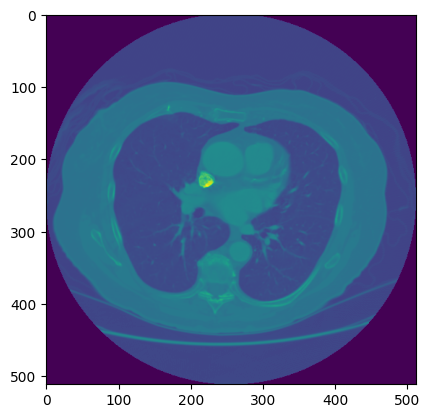

In [13]:
from matplotlib import pyplot as plt
plt.imshow(normalize_version)

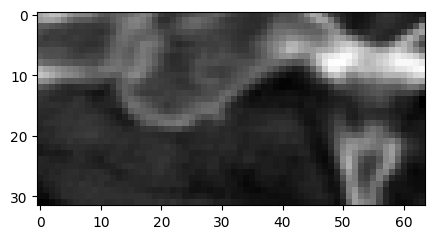

In [14]:
ds2 = dcm.read_file("C:\\Prj\\LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-NA-NA-30178\\3000566.000000-NA-03192\\1.3.6.1.4.1.14519.5.2.1.6279.6001.265752406785564034990206112632.dcm")
plt.figure(figsize = (5,5))
from copy import copy
plt.imshow(ds2.pixel_array[396-16:396+16:, 216-32:216+32:], 'gray')


In [15]:
import xml.etree.ElementTree as etree

In [16]:
NS = {'nih': 'http://www.nih.gov'}

def parse(xml_filename):
    print("Parsing %s" % xml_filename)
    annotations = []
    # ET is the library we use to parse xml data
    tree = etree.parse(xml_filename)
    print('Tree', tree)
    root = tree.getroot()
    # header = parse_header(root)
    # readingSession-> holds radiologist's annotation info
    print('Root', root)
    for read_session in root.findall('nih:readingSession', NS):
        # to hold each radiologists annotation
        # i.e. readingSession in xml file
        rad_annotation = nodule_structs.RadAnnotation()
        rad_annotation.version = read_session.find('nih:annotationVersion', NS).text
        rad_annotation.id = read_session.find('nih:servicingRadiologistID', NS).text

        # nodules
        nodule_nodes = read_session.findall('nih:unblindedReadNodule', NS)
        for node in nodule_nodes:
            # print("node from parse")
            # print(node)
            nodule = ants.parse_nodule(node)
            if nodule.is_small:
                rad_annotation.small_nodules.append(nodule)
            else:
                rad_annotation.nodules.append(nodule)

        # non-nodules
        non_nodule = read_session.findall('nih:nonNodule', NS)
        for node in non_nodule:
            nodule = ants.parse_non_nodule(node)
            rad_annotation.non_nodules.append(nodule)
        annotations.append(rad_annotation)
    return annotations

In [17]:
import nodule_structs
import annotations as ants

In [18]:
xml_filename = 'C:\\Prj\\LIDC-IDRI\\xml_test\\069.xml'

print("Parsing %s" % xml_filename)
annotations = []

tree = etree.parse(xml_filename)
print('Tree', tree)
root = tree.getroot()
# header = parse_header(root)
# readingSession-> holds radiologist's annotation info
print('Root', root)
rad_annotation = nodule_structs.RadAnnotation()
resp_hdr = root.findall('nih:ResponseHeader', NS)[0]
rad_annotation.SeriesInstanceUid = resp_hdr.find('nih:SeriesInstanceUid', NS).text
for read_session in root.findall('nih:readingSession', NS):
    # to hold each radiologists annotation
    # i.e. readingSession in xml file
    rad_annotation.version = read_session.find('nih:annotationVersion', NS).text
    rad_annotation.id = read_session.find('nih:servicingRadiologistID', NS).text
    # nodules
    nodule_nodes = read_session.findall('nih:unblindedReadNodule', NS)
    for node in nodule_nodes:
        # print("node from parse")
        # print(node)
        nodule = ants.parse_nodule(node)
        if nodule.is_small:
            rad_annotation.small_nodules.append(nodule)
        else:
            rad_annotation.nodules.append(nodule)

    # non-nodules
    non_nodule = read_session.findall('nih:nonNodule', NS)
    for node in non_nodule:
        nodule = ants.parse_non_nodule(node)
        rad_annotation.non_nodules.append(nodule)
    annotations.append(rad_annotation)
    rad_annotation = nodule_structs.RadAnnotation() 

Parsing C:\Prj\LIDC-IDRI\xml_test\069.xml
Tree <xml.etree.ElementTree.ElementTree object at 0x0000024138A88F70>
Root <Element '{http://www.nih.gov}LidcReadMessage' at 0x000002414BB1EDE0>


In [19]:
annotations

In [57]:
def small_nds(annots):
    smnds = []
    all_smnds = []
    for k in annots:
        print(k.SeriesInstanceUid)
        all_smnds.append([])
        for i in k.small_nodules:
            for j in i.rois:
                all_smnds[-1].append([j.sop_uid, j.roi_xy[0]])
    for i in all_smnds:
        print(i)
    smnds.append(annots[0].SeriesInstanceUid)
    while len(all_smnds) != 0:
        print(len(all_smnds))
        temp = all_smnds.pop(0)
        print(len(all_smnds))
        for i in range(len(temp)):
            k = 0
            while k != len(all_smnds):
                s = 0
                while s != len(all_smnds[k]):
                    if all_smnds[k][s][0] == temp[i][0]:
                        #проверка на близость нахождения центроидов для исключения дублей
                        if abs(temp[i][1][0] - all_smnds[k][s][1][0]) < 16 and abs(temp[i][1][1] - all_smnds[k][s][1][1]) < 16:
                            print("удаление дубля", all_smnds[k].pop(s))
                        else:
                            s += 1
                        print("s", s)
                    else:
                        s += 1
                k += 1
                print("k", k)
            smnds.append(temp[i])
    print(smnds)


small_nds(annotations)

1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
NoneSeries
NoneSeries
NoneSeries
[['1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255', [187, 166]], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', [403, 272]], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', [392, 317]]]
[]
[['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', [392, 317]], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', [404, 273]], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255', [189, 167]]]
[['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', [392, 316]], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', [403, 272]], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255', [188, 166]]]
4
3
k 1
удаление дубля ['1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255', [189, 167]]
s 2
k 2
удаление дубля ['1.3.6.1.4.1.14519.5.2.1.6279.

In [56]:
for k in annotations:
    print(k.SeriesInstanceUid)
    for i in k.small_nodules:
        #print(i)
        for j in i.rois:
                print(j.sop_uid, j.roi_xy[0])

1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255 [187, 166]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [403, 272]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [392, 317]
NoneSeries
NoneSeries
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [392, 317]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [404, 273]
1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255 [189, 167]
NoneSeries
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [392, 316]
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142 [403, 272]
1.3.6.1.4.1.14519.5.2.1.6279.6001.313544823773855097029348077255 [188, 166]


In [51]:
def nnd(annots):
    nnds = []
    all_nnds = []
    for k in annots:
        print(k.SeriesInstanceUid)
        all_nnds.append([])
        for i in k.non_nodules:
            for j in i.rois:
                all_nnds[-1].append([j.sop_uid, j.roi_xy[0]])
    for i in all_nnds:
        print(i)
    nnds.append(annots[0].SeriesInstanceUid)
    while len(all_nnds) != 0:
        print(len(all_nnds))
        temp = all_nnds.pop(0)
        print(len(all_nnds))
        for i in range(len(temp)):
            k = 0
            while k != len(all_nnds):
                s = 0
                while s != len(all_nnds[k]):
                    if all_nnds[k][s][0] == temp[i][0]:
                        #проверка на близость нахождения центроидов для исключения дублей
                        if abs(temp[i][1][0] - all_nnds[k][s][1][0]) < 16 and abs(temp[i][1][1] - all_nnds[k][s][1][1]) < 16:
                            print("удаление дубля", all_nnds[k].pop(s))
                        else:
                            s += 1
                        print("s", s)
                    else:
                        s += 1
                k += 1
                print("k", k)
            nnds.append(temp[i])
    print(nnds)


nnd(annotations)

1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192
NoneSeries
NoneSeries
NoneSeries
[['1.3.6.1.4.1.14519.5.2.1.6279.6001.265752406785564034990206112632', (396, 216)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.588464900616851045070333788793', (200, 342)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', (109, 291)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.980992723094835143194725792701', (212, 157)]]
[['1.3.6.1.4.1.14519.5.2.1.6279.6001.195458112408977878368429993130', (408, 209)]]
[['1.3.6.1.4.1.14519.5.2.1.6279.6001.980992723094835143194725792701', (213, 157)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142', (109, 291)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.193784360214506863621989507827', (399, 211)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.588464900616851045070333788793', (135, 345)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.588464900616851045070333788793', (169, 343)], ['1.3.6.1.4.1.14519.5.2.1.6279.6001.588464900616851045070333788793', (200, 342)

In [28]:
nnd = []
for i in annotations[0].non_nodules:
    for i in i.rois:
        nnd.append([])
        
        print(i.sop_uid)

1.3.6.1.4.1.14519.5.2.1.6279.6001.265752406785564034990206112632
1.3.6.1.4.1.14519.5.2.1.6279.6001.588464900616851045070333788793
1.3.6.1.4.1.14519.5.2.1.6279.6001.315606855383999143703852453142
1.3.6.1.4.1.14519.5.2.1.6279.6001.980992723094835143194725792701


In [21]:
for i in rad_annotation.small_nodules:
    for j in i.rois:
        print(j.sop_uid, j.roi_xy)
print(rad_annotation.__str__())

Series Instance UID NoneSeries
Annotation Version [None] Radiologist ID [None] 
#Nodules [0] #SmallNodules [0] #NonNodules[0] 
-------------------------------------------------------------------------------



In [22]:
parse('C:\\Prj\\LIDC-IDRI\\xml_test\\069.xml')

Parsing C:\Prj\LIDC-IDRI\xml_test\069.xml
Tree <xml.etree.ElementTree.ElementTree object at 0x000002414BB05C30>
Root <Element '{http://www.nih.gov}LidcReadMessage' at 0x000002414BB1C3B0>


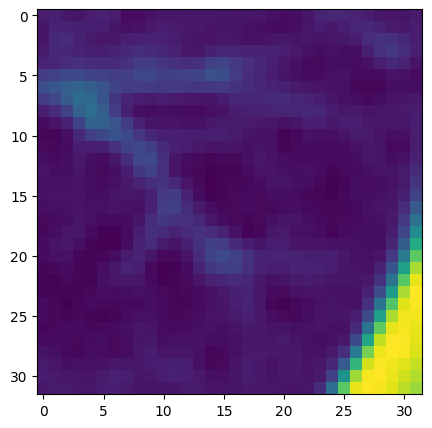

In [23]:
from copy import copy
test = copy(ds2.pixel_array[317-16:317+16:, 392-16:392+16:])
temp = test - np.min(test)
temp = (temp/np.max(temp))*255
plt.figure(figsize = (5,5))

plt.imshow(temp, vmin=0, vmax=255)

In [24]:
np.min(test)

91

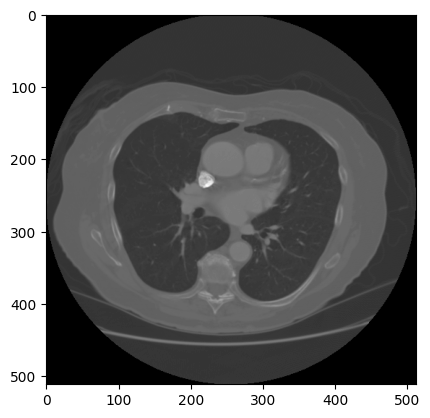

In [25]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [26]:
dd = pd.read_pickle('C:\\Prj\\LIDC-IDRI\\xml_test\\annotation.pkl')

In [27]:
for i in dd:
    for j in i:
        print(j.__str__())

AttributeError: 'RadAnnotation' object has no attribute 'SeriesInstanceUid'